In [1]:
%matplotlib inline
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# load data
def load_data():
    working_folder = ".."
    data_folder = "data"
    format1_fdir = 'data_format1_20180930_20181007.h5'#data_format1_201808.h5'#923_20180930.h5'#
    format2_fdir = 'data_format2_20180930_20181007.h5'#data_format2_201808.h5'#923_20180930.h5'#

    format1_dir = os.path.join(working_folder, data_folder, format1_fdir)
    format2_dir = os.path.join(working_folder, data_folder, format2_fdir)

    sys.path.append(working_folder)

    f1_data = pd.HDFStore(format1_dir)
    keys = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
    series_avg = pd.DataFrame()
    for key in keys:
        series_avg[key] = (0.25 * (f1_data[key]['close'] + f1_data[key]['open'] + f1_data[key]['high'] + f1_data[key]['low']))
    # TODO add volume
    f1_data.close()
    return series_avg, keys

In [3]:
# define func
def train_test_split_self(data_x, data_y, test_size=0.33):
    size = len(data_x)
    train_size = int(len(data_x) * (1-test_size))
    return data_x[:train_size], data_x[train_size:], data_y[:train_size], data_y[train_size:]

In [4]:
# train model
def train_model(data_x, data_y, is_plot:bool=False, is_print:bool=False):
    
    X_train, X_test, y_train, y_test = train_test_split_self(data_x, data_y, test_size=0.33)#, random_state=42)

    # Create linear regression object
    regr = linear_model.LinearRegression()
#    regr = MLPRegressor()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    # Explained variance score: 1 is perfect prediction
    score = r2_score(y_test, y_pred)#regr.score(X_test, y_test)#

    if is_print:
        print("Mean squared error: %.2f" % mse)
        print('Variance score: %.2f' % score)
         # The coefficients
        print('Coefficients: \n', regr.coef_)
        print('Intercept: \n', regr.intercept_)

    # Plot outputs
    if is_plot:
        fig = plt.figure(figsize=(10,7))
        x_axis = np.arange(len(X_test))
        ax1 = plt.plot(x_axis, y_test,  color='red')#scatter(x_axis, y_test,  color='black')
        ax2 = plt.plot(x_axis, y_pred, color='blue', linewidth=3)
        plt.legend(['test', 'pred'])
        
        plt.xticks()
        plt.yticks()

        plt.show()
    
    
    return regr, {'mse':mse, 'score':score, 'mae': mae}

shift 1


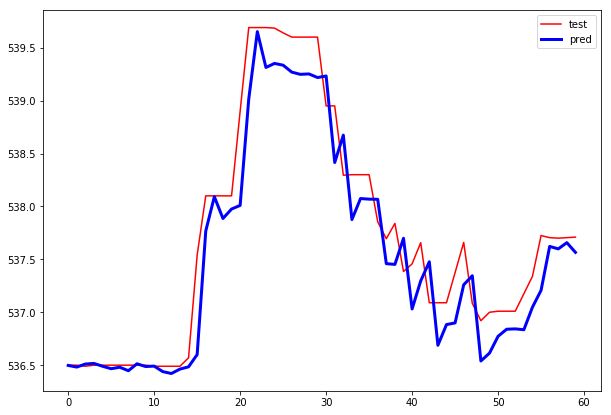

asset: BCH-USD, shift_period: 1
Mean absolute error: 0.25
score: 0.91
Coefficients:  [ 1.2381511  -0.00719347  0.22930292  2.22921948 -0.37813495  0.00785552
 -0.07215746 -1.86311335]
Intercept:  12.138046018123305
---------------------------------------
shift 1


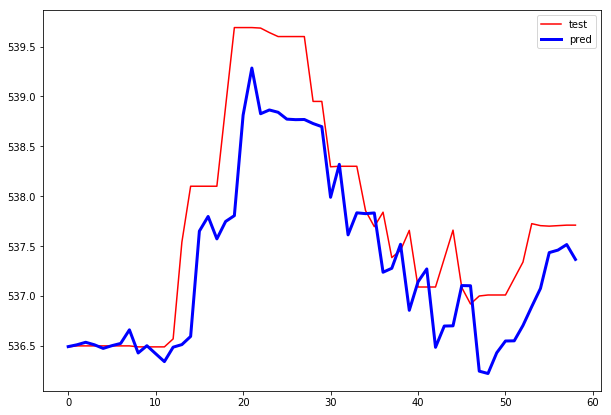

asset: BCH-USD, shift_period: 2
Mean absolute error: 0.45
score: 0.67
Coefficients:  [ 1.11733996 -0.06222319  0.26694358  3.88055356 -0.4763057   0.06940653
  0.14256023 -3.26047557]
Intercept:  13.012442106392996
---------------------------------------
shift 1


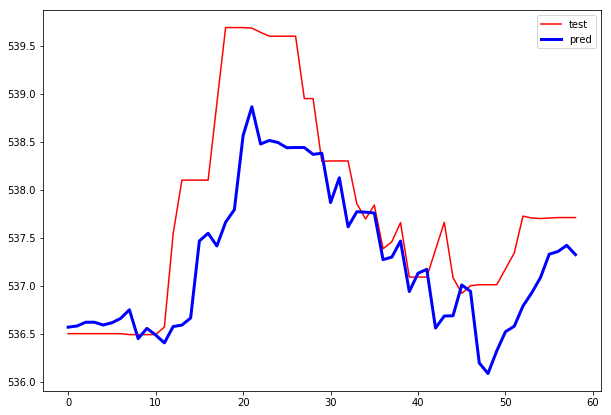

asset: BCH-USD, shift_period: 3
Mean absolute error: 0.56
score: 0.47
Coefficients:  [ 0.81515224 -0.0671967   0.49235539  3.46339383 -0.36475196  0.09716881
  0.11746816 -3.01366537]
Intercept:  -70.25292919581295
---------------------------------------
shift 1


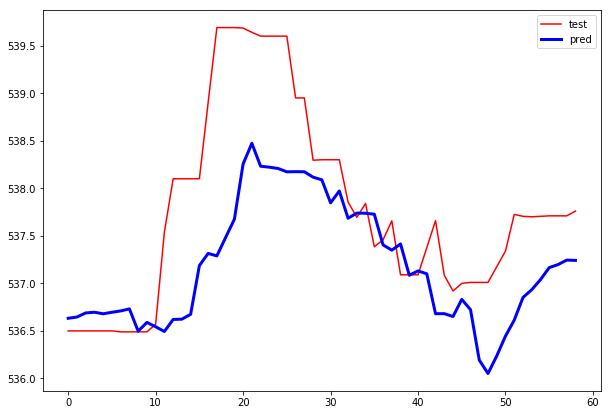

asset: BCH-USD, shift_period: 4
Mean absolute error: 0.68
score: 0.22
Coefficients:  [ 0.46375324 -0.03829752  0.39985283  2.36638366 -0.17046488  0.08231674
  0.40730055 -2.06274209]
Intercept:  -114.90521050625978
---------------------------------------
shift 1


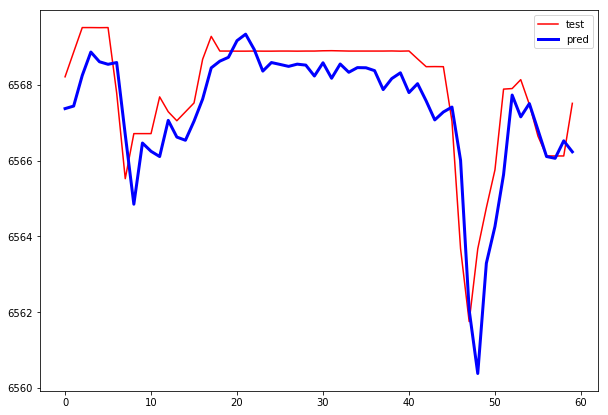

asset: BTC-USD, shift_period: 1
Mean absolute error: 0.76
score: 0.62
Coefficients:  [ 0.39048279  1.03444604  2.02805698  7.87129883 -0.48055233 -0.16716329
 -1.05735053 -7.08515586]
Intercept:  647.1241471038757
---------------------------------------
shift 1


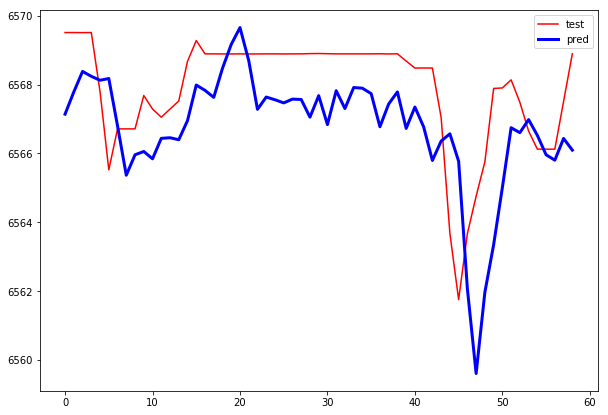

asset: BTC-USD, shift_period: 2
Mean absolute error: 1.50
score: -0.31
Coefficients:  [  0.87976424   0.69351706   3.59601905  11.97328149  -1.36908637
   0.10581067  -1.73051697 -10.43456053]
Intercept:  1054.7107926175513
---------------------------------------
shift 1


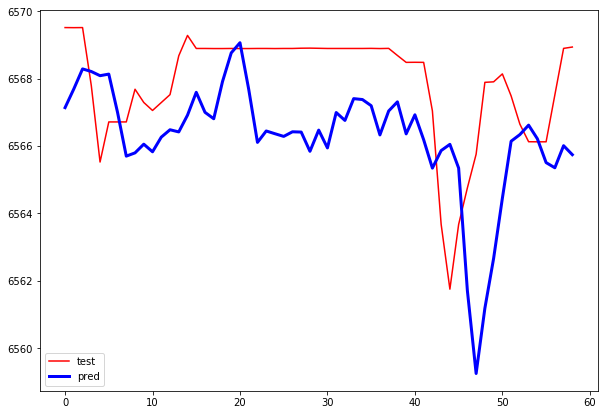

asset: BTC-USD, shift_period: 3
Mean absolute error: 2.04
score: -1.34
Coefficients:  [  0.45535359   0.53993513   3.99208224  12.9479331   -1.46346
   0.24378521  -1.4406878  -11.05498938]
Intercept:  1255.393860792742
---------------------------------------
shift 1


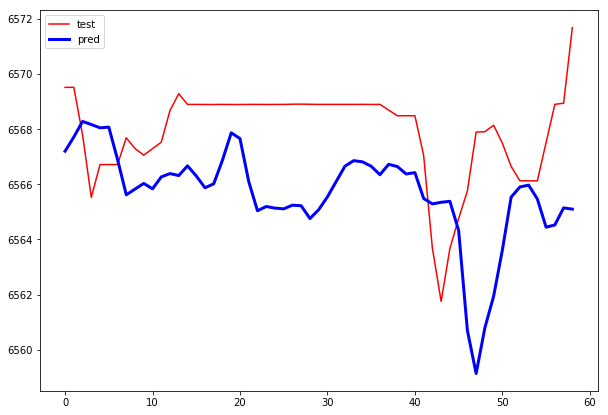

asset: BTC-USD, shift_period: 4
Mean absolute error: 2.64
score: -2.62
Coefficients:  [-0.75831976  0.54923198  3.22203106 11.71507109 -0.75218756  0.19606454
  0.01599359 -9.04910841]
Intercept:  1571.4315148631258
---------------------------------------
shift 1


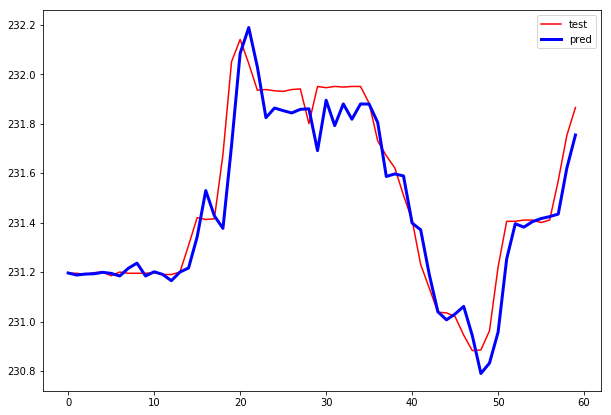

asset: ETH-USD, shift_period: 1
Mean absolute error: 0.07
score: 0.91
Coefficients:  [ 0.09629973 -0.01449876  1.20189529  0.73806566 -0.11610119  0.01579808
 -0.23515044 -0.7021078 ]
Intercept:  7.599139331388983
---------------------------------------
shift 1


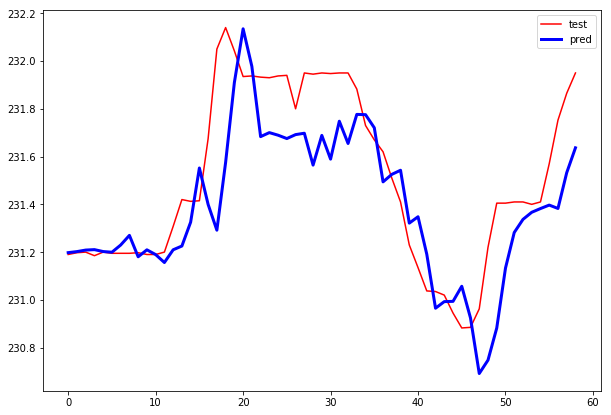

asset: ETH-USD, shift_period: 2
Mean absolute error: 0.17
score: 0.59
Coefficients:  [ 0.15123297 -0.02394642  0.94857104  1.17019404 -0.22588535  0.02692747
  0.02006313 -1.05635652]
Intercept:  20.816215648166832
---------------------------------------
shift 1


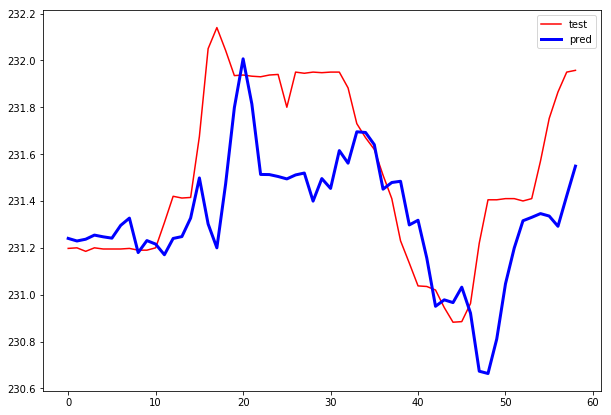

asset: ETH-USD, shift_period: 3
Mean absolute error: 0.25
score: 0.15
Coefficients:  [ 0.08890917 -0.03731621  0.8515411   0.91000225 -0.2358878   0.04498737
  0.13885522 -0.74713959]
Intercept:  20.826486100028916
---------------------------------------
shift 1


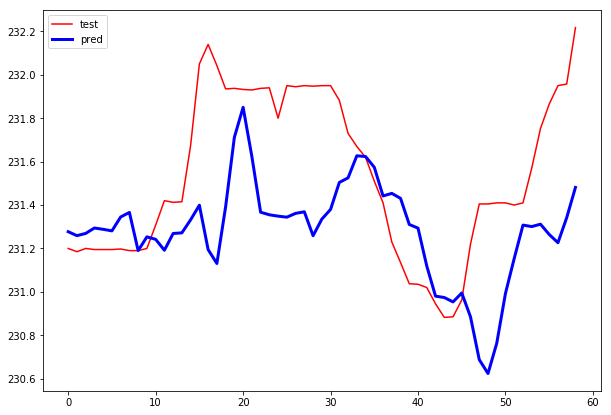

asset: ETH-USD, shift_period: 4
Mean absolute error: 0.33
score: -0.29
Coefficients:  [-0.02670283 -0.04246073  0.78286233  0.7499357  -0.18187116  0.0548335
  0.21929534 -0.56514344]
Intercept:  18.966489757667546
---------------------------------------
shift 1


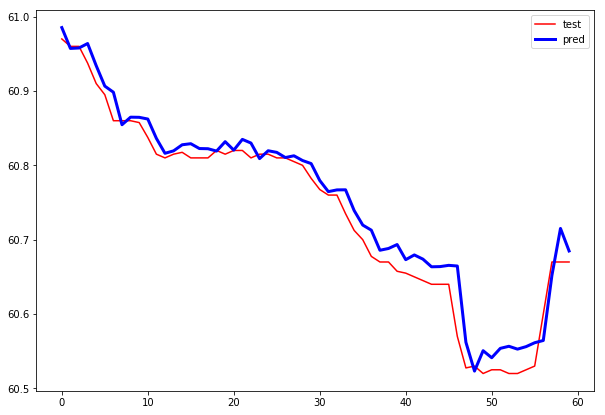

asset: LTC-USD, shift_period: 1
Mean absolute error: 0.02
score: 0.96
Coefficients:  [ 4.83616343e-03  1.60454864e-03 -3.29627852e-03  1.35420054e+00
 -9.18016908e-03  9.18761391e-04  5.19210653e-03 -4.36941058e-01]
Intercept:  -9.636349199285881
---------------------------------------
shift 1


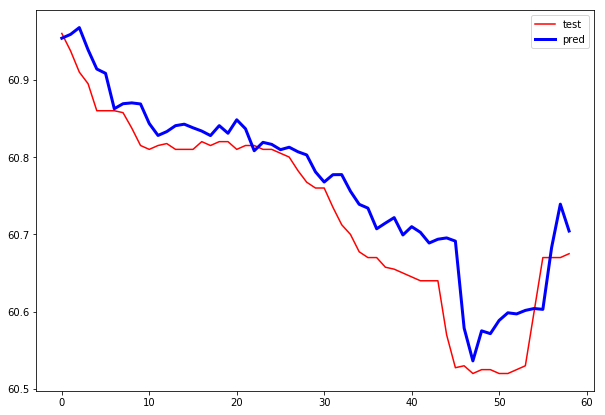

asset: LTC-USD, shift_period: 2
Mean absolute error: 0.04
score: 0.83
Coefficients:  [ 5.86179878e-03  4.01701568e-03  6.03838873e-04  1.32932341e+00
 -1.80012169e-02  1.61309491e-03  9.18565352e-03 -5.20753843e-01]
Intercept:  -21.05928329681666
---------------------------------------
shift 1


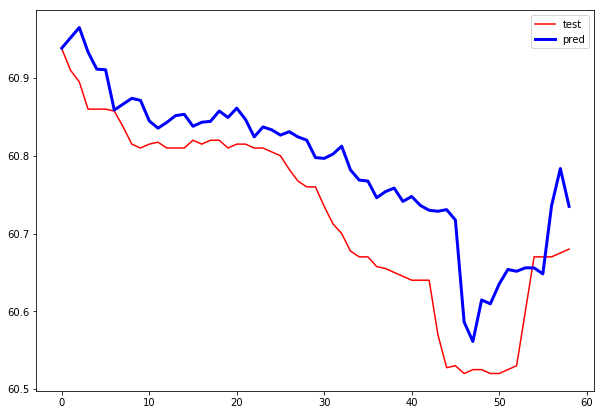

asset: LTC-USD, shift_period: 3
Mean absolute error: 0.07
score: 0.55
Coefficients:  [-6.97984987e-03  7.76199781e-03  6.09231101e-03  1.41691831e+00
 -7.65204167e-03  7.42207506e-04  1.65566586e-02 -7.49394113e-01]
Intercept:  -32.98176273182178
---------------------------------------
shift 1


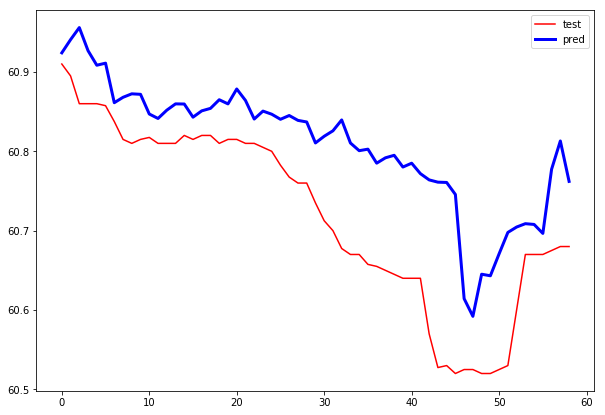

asset: LTC-USD, shift_period: 4
Mean absolute error: 0.09
score: 0.14
Coefficients:  [-0.01117489  0.00827172 -0.0034913   1.34819578 -0.00745019  0.00230401
  0.04589945 -0.82331492]
Intercept:  -40.329063998546
---------------------------------------


In [7]:
# load data
series_avg, keys = load_data()
# train model
shift_period = 1
data_length = 60 * 3#24 * 60 * 2
asset = keys[1]


models_mse = dict()
models_mae = dict()
models_score = dict()

def get_rename_dict(t):
    return {'BCH-USD':'BCH-USD_%i'%t, 'BTC-USD':'BTC-USD_%i'%t, 'ETH-USD':'ETH-USD_%i'%t, 'LTC-USD':'LTC-USD_%i'%t}

# train
for asset in keys:
    mses = []
    maes = []
    scores = []
    models_mse[asset] = mses
    models_mae[asset] = maes
    models_score[asset] = scores
    for shift_period in range(1,5):
        # Load the diabetes dataset
        all_asset = keys.copy()
        # all_asset.remove(asset)
        data_x = series_avg[all_asset]

        for t in range(1):# if shift_period > 1 else 1):
            t = t+1
            print(f"shift {t}")
            data_x_t = series_avg[all_asset].shift(1 * t)
            data_x_t = data_x_t.rename(columns=get_rename_dict(t))
            data_x = data_x.join(data_x_t)
#         data_x = data_x.values[shift_period:]
        
        # shift forward the predict value, as using the price at 
        data_y = series_avg[asset].shift(-1 * shift_period)[:-1*shift_period].values
        data_x = data_x[shift_period:data_length]
        data_y = data_y[shift_period:data_length]
        
        model, judge_dict = train_model(data_x, data_y, is_plot=True, is_print=False)
        
        mses.append(judge_dict['mse'])#  / model.intercept_)#math.sqrt(judge_dict['mse']) / model.intercept_)
        maes.append(judge_dict['mae'])#  / model.intercept_)
        scores.append(judge_dict['score'])
        
        print(f"asset: {asset}, shift_period: {shift_period}")
        print("Mean absolute error: %.2f" % judge_dict['mae'])
        print('score: %.2f' % judge_dict['score'])
        print('Coefficients: ', model.coef_)
        print('Intercept: ', model.intercept_)
        print('---------------------------------------')

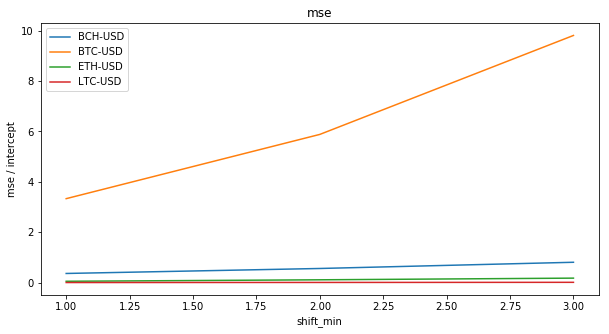

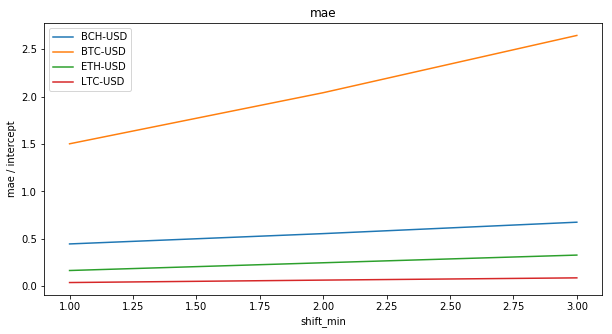

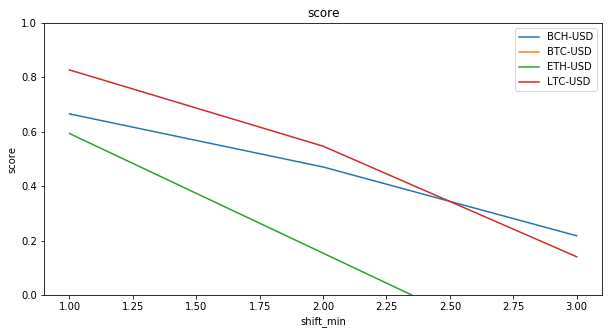

In [190]:
# plot
model_pd_mse = pd.DataFrame(models_mse)
model_pd_mae = pd.DataFrame(models_mae)
model_pd_score = pd.DataFrame(models_score)

x = [x+1 for x in range(len(model_pd_mse))]
model_pd_mse = model_pd_mse.reindex(x)
model_pd_mae = model_pd_mae.reindex(x)
model_pd_score = model_pd_score.reindex(x)

ax_mse = model_pd_mse.plot(figsize=(10, 5), title='mse')#, logy=True)
ax_mse.xaxis.label.set_text('shift_min')
ax_mse.yaxis.label.set_text('mse / intercept')

ax_mse = model_pd_mae.plot(figsize=(10, 5), title='mae')#, logy=True)
ax_mse.xaxis.label.set_text('shift_min')
ax_mse.yaxis.label.set_text('mae / intercept')

ax_score = model_pd_score.plot(figsize=(10, 5), title='score', ylim=0)
ax_score.xaxis.label.set_text('shift_min')
ax_score.yaxis.label.set_text('score')

In [ ]:
# series_avg_copy = series_avg.copy()
# series_avg_copy[keys[3]] = series_avg[keys[3]].shift(-1 * 60 * 0)
# period=60*10
# series_avg_copy[:period].plot(figsize=(14,10), grid=True, subplots=True)
# # series_avg.corr()
# series_avg_copy[:period].corr()

In [42]:
?r2_score

In [13]:
?mean_absolute_error

In [91]:
series_avg[all_asset].head(20)

,BCH-USD,BTC-USD,ETH-USD,LTC-USD
time,,,,
2018-09-30 06:00:00,533.0450,6552.5125,230.2950,60.6575
2018-09-30 06:01:00,533.3000,6552.5150,230.1575,60.6600
2018-09-30 06:02:00,533.4450,6552.8850,230.1600,60.6300
2018-09-30 06:03:00,533.4500,6552.5300,230.1550,60.6775
2018-09-30 06:04:00,533.8950,6553.2700,230.1500,60.7450
2018-09-30 06:05:00,534.7600,6553.9975,230.2500,60.7450
2018-09-30 06:06:00,534.6700,6553.9950,230.3400,60.7400
2018-09-30 06:07:00,534.2775,6553.9975,230.3400,60.7300
2018-09-30 06:08:00,534.0200,6553.9925,230.3350,60.7175


In [165]:
shift_period = 3
asset = 'BTC-USD'
all_asset = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
data_x = series_avg[all_asset]
def get_rename_dict(t):
    return {'BCH-USD':'BCH-USD_%i'%t, 'BTC-USD':'BTC-USD_%i'%t, 'ETH-USD':'ETH-USD_%i'%t, 'LTC-USD':'LTC-USD_%i'%t}
for t in range(shift_period - 1):
    t = t+1
    data_x_t = series_avg[all_asset].shift(1 * t)
    data_x_t = data_x_t.rename(columns=get_rename_dict(t))
    data_x = data_x.join(data_x_t)
#data_x = data_x.values[:-1*t]
data_x.head()

,BCH-USD,BTC-USD,ETH-USD,LTC-USD,BCH-USD_1,BTC-USD_1,ETH-USD_1,LTC-USD_1,BCH-USD_2,BTC-USD_2,ETH-USD_2,LTC-USD_2
time,,,,,,,,,,,,
2018-09-30 06:00:00,533.045,6552.5125,230.2950,60.6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30 06:01:00,533.300,6552.5150,230.1575,60.6600,533.045,6552.5125,230.2950,60.6575,NaN,NaN,NaN,NaN
2018-09-30 06:02:00,533.445,6552.8850,230.1600,60.6300,533.300,6552.5150,230.1575,60.6600,533.045,6552.5125,230.2950,60.6575
2018-09-30 06:03:00,533.450,6552.5300,230.1550,60.6775,533.445,6552.8850,230.1600,60.6300,533.300,6552.5150,230.1575,60.6600
2018-09-30 06:04:00,533.895,6553.2700,230.1500,60.7450,533.450,6552.5300,230.1550,60.6775,533.445,6552.8850,230.1600,60.6300


# LSTM Model

In [145]:
def gen_train(data, seq_len):
    """
    Generates training data
    :param seq_len: length of window
    :return: X_train and Y_train
    """
    X_train = []
    y_train = []
    input_train = []
    output_train = []
    for i in range((len(data)//seq_len)*seq_len - seq_len - 1):
        x = np.array(data.iloc[i: i + seq_len])
        y = np.array([data.iloc[i + seq_len + 1]], np.float64)
        input_train.append(x)
        output_train.append(y)
    X_train = np.array(input_train)
    y_train = np.array(output_train)
    return X_train, y_train

In [146]:
del model

In [176]:
model = keras.Sequential()
model.add(keras.layers.LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(optimizer="adam", loss="mean_squared_error")

In [177]:
# # load data
# series_avg, keys = load_data()
# # train model
# shift_period = 1
# data_length = 60
# asset = keys[1]
# all_asset = keys.copy()

# data_x = series_avg[all_asset]
# # shift forward the predict value, as using the price at 
# data_y = series_avg[asset].shift(-1 * shift_period)[:-1*shift_period].values
# data_x = data_x[shift_period:data_length]
# data_y = data_y[shift_period:data_length]

In [178]:
# X_train, X_test, y_train, y_test = train_test_split_self(data_x, data_y, test_size=0.33)#, random_state=42)
data_train = series_avg['BTC-USD'][:5*60*24]
data_test = series_avg['BTC-USD'][2*60*24:]

In [179]:
seq_len=10
(len(data_train)//seq_len)*seq_len - seq_len - 1

7189

In [180]:
series_avg, keys = load_data()
X_train, y_train = gen_train(data_train, 10)
X_test, y_test = gen_train(data_test, 10)

In [182]:
model.fit(X_train.reshape(7189, 10, -1), y_train, epochs=50)
model.evaluate(X_test.reshape(7189, 10, -1), y_test)

Epoch 1/50
7189/7189 [==============================] - 6s 857us/step - loss: 42693091.1203
Epoch 2/50
7189/7189 [==============================] - 4s 566us/step - loss: 42602623.7457
Epoch 3/50
7189/7189 [==============================] - 4s 563us/step - loss: 42536797.5785
Epoch 4/50
7189/7189 [==============================] - 4s 561us/step - loss: 42472980.1358
Epoch 5/50
7189/7189 [==============================] - 4s 563us/step - loss: 42410046.2929
Epoch 6/50
7189/7189 [==============================] - 4s 585us/step - loss: 42347622.0420
Epoch 7/50
7189/7189 [==============================] - 4s 591us/step - loss: 42285535.8420
Epoch 8/50
7189/7189 [==============================] - 4s 582us/step - loss: 42223692.2103
Epoch 9/50
7189/7189 [==============================] - 4s 575us/step - loss: 42162034.6062
Epoch 10/50
7189/7189 [==============================] - 4s 587us/step - loss: 42100526.2712
Epoch 11/50
7189/7189 [==============================] - 4s 573us/step - loss: 

39501894.56948115

In [135]:
def back_test(strategy, seq_len):
    """
    A simple back test for a given date period
    :param strategy: the chosen strategy. Note to have already formed the model, and fitted with training data.
    :param seq_len: length of the days used for prediction
    :param ticker: company ticker
    :param start_date: starting date
    :type start_date: "YYYY-mm-dd"
    :param end_date: ending date
    :type end_date: "YYYY-mm-dd"
    :param dim: dimension required for strategy: 3dim for LSTM and 2dim for MLP
    :type dim: tuple
    :return: Percentage errors array that gives the errors for every test in the given date range
    """
#     data = pdr.get_data_yahoo(ticker, start_date, end_date)
#     stock_data = data["Adj Close"]
    stock_data = data_test
    errors = []
    for i in range((len(stock_data)//10)*10 - seq_len - 1):
        x = np.array(stock_data.iloc[i: i + seq_len, 1]).reshape(-1, 1, 10) / 200
        y = np.array(stock_data.iloc[i + seq_len + 1, 1]) / 200
        predict = strategy.predict(x)
        while predict == 0:
            predict = strategy.predict(x)
        error = (predict - y) / 100
        errors.append(error)
        total_error = np.array(errors)
    print(f"Average error = {total_error.mean()}")

In [184]:
predict = model.predict(X_test.reshape(7189, 10, -1))

In [185]:
predict

array([[242.8413],
       [242.8413],
       [242.8413],
       ...,
       [242.8413],
       [242.8413],
       [242.8413]], dtype=float32)

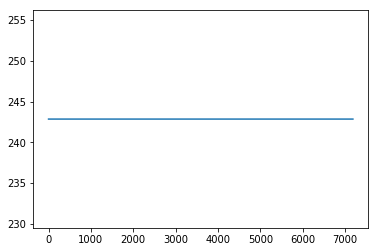

In [187]:
# plt.plot(range(y_test.shape[0]), y_test.reshape(-1))
plt.plot(range(y_test.shape[0]), predict.reshape(-1))